In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

#### Importing Data

In [2]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y= boston.target

In [3]:
df['Price']= y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data visualization

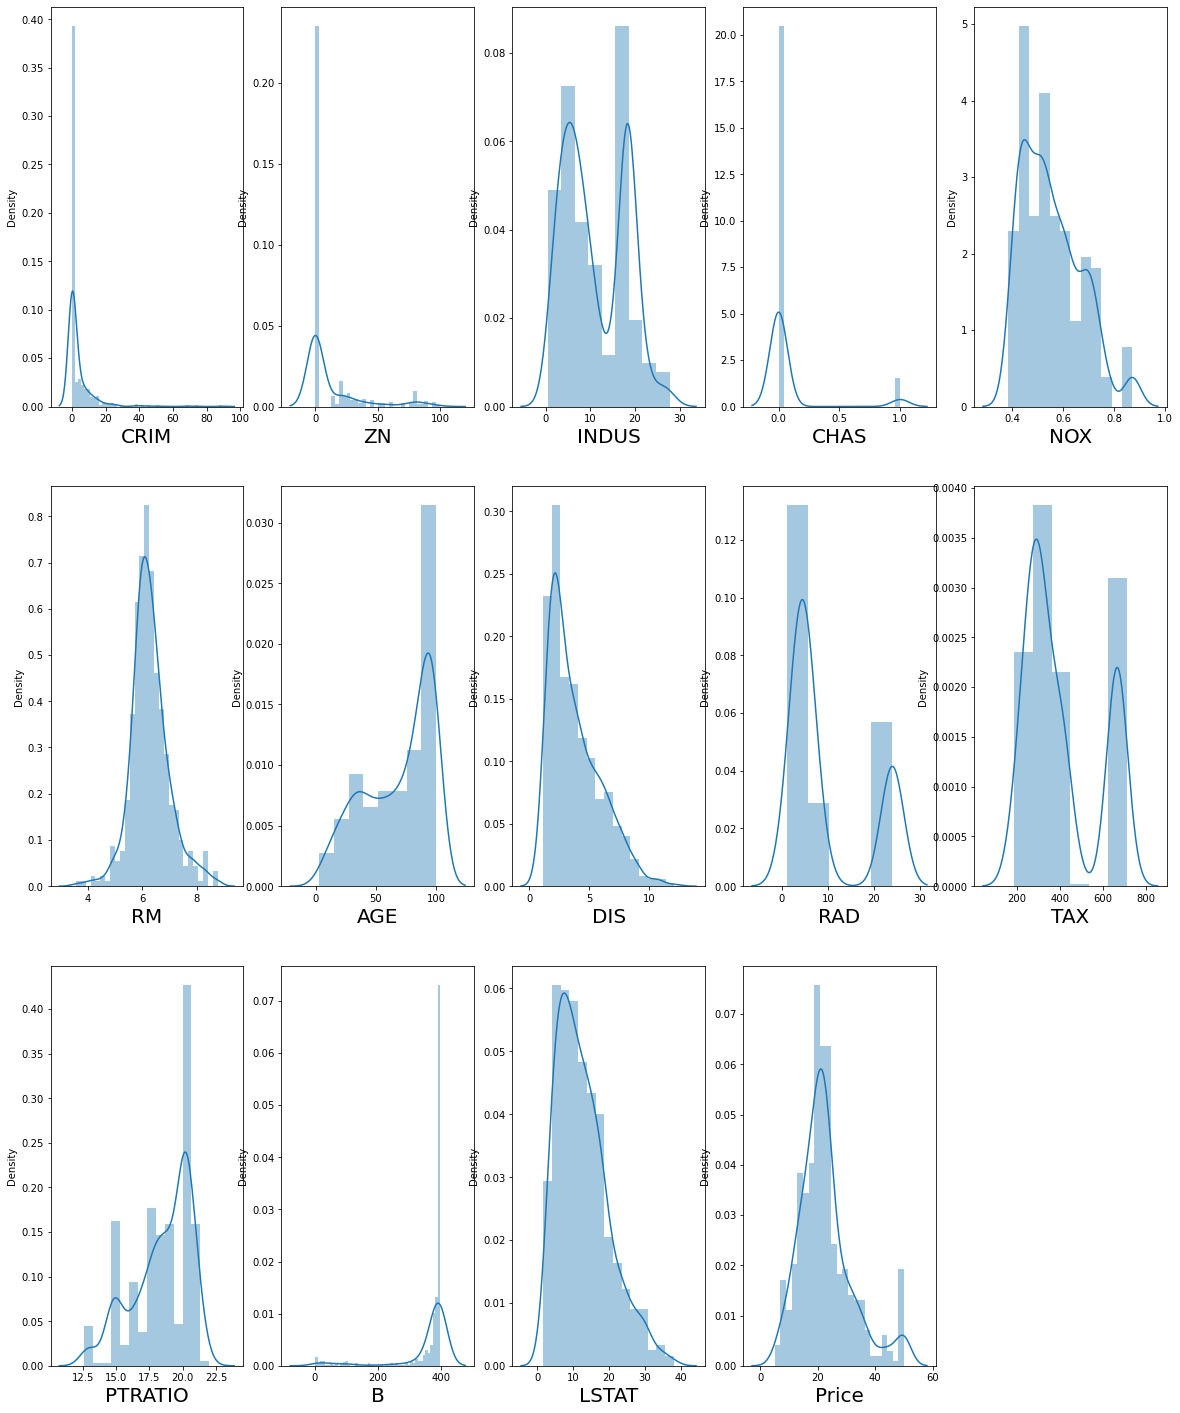

In [5]:
# data distribution

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

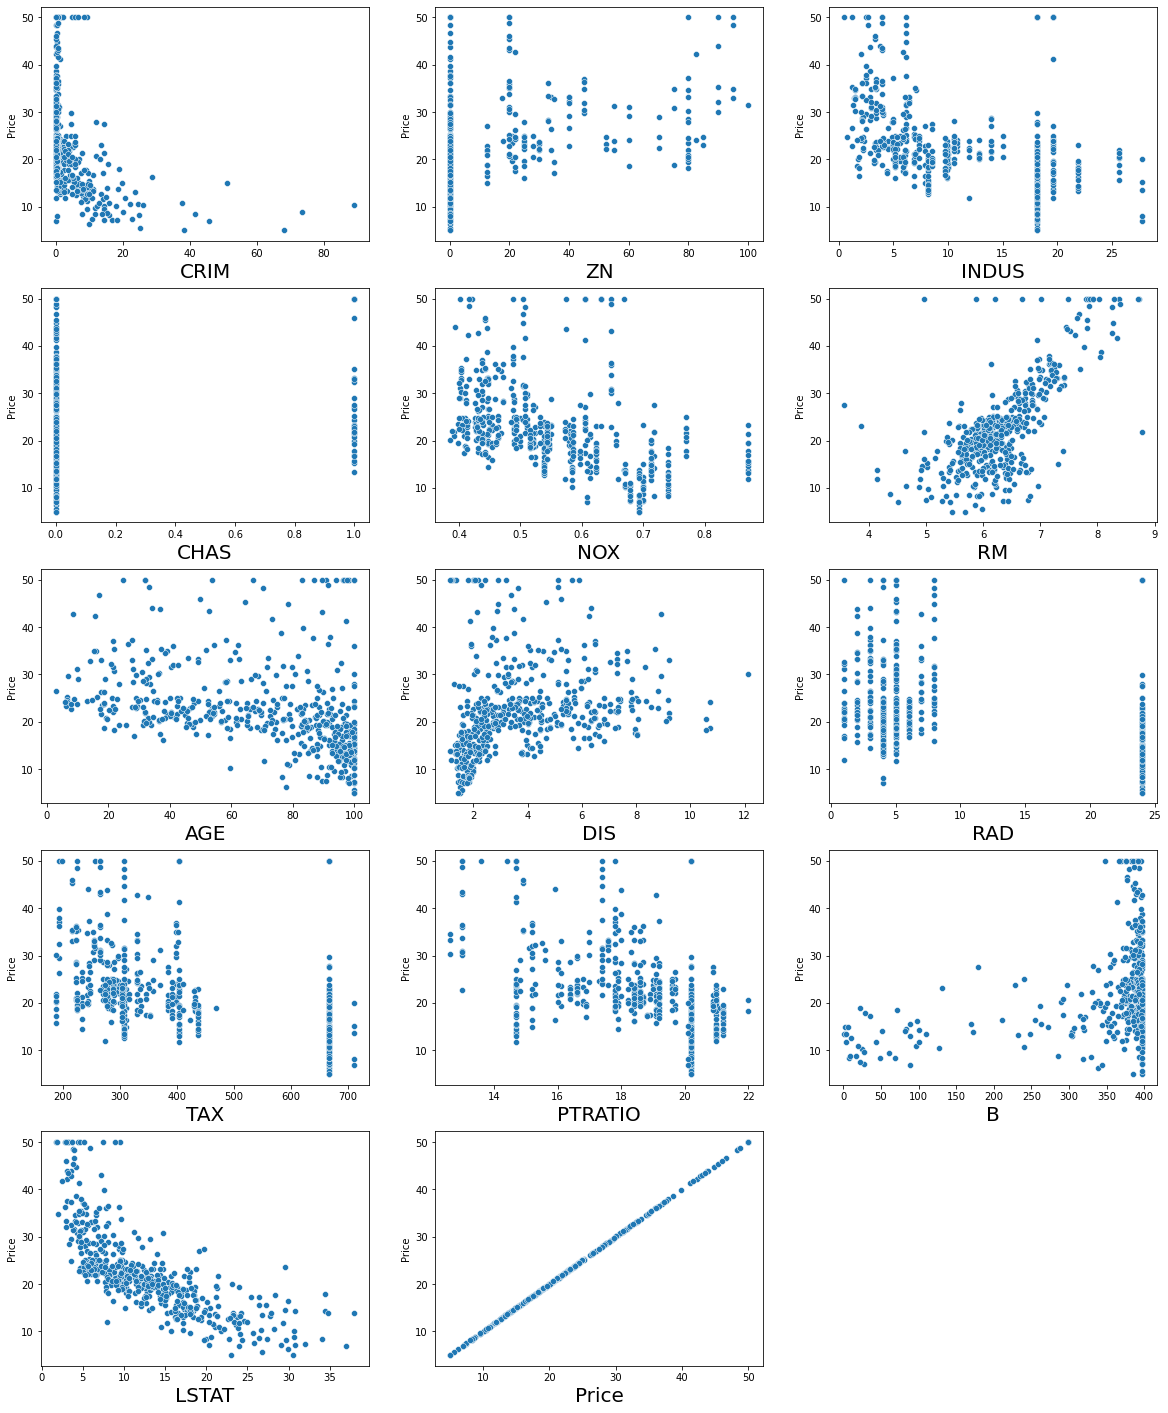

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(df[column],df['Price'])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

Here, RAD and CHAS are the only categorical features. All other features are continous

#### Creating Regression model

In [7]:
X= df.drop(columns=['Price'])
y= df['Price']

In [8]:
## Scaling the values to normalize
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [9]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.30, random_state= 45)

In [10]:
model = RandomForestRegressor(n_estimators=1000, oob_score= True, random_state=6)

In [11]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=6)

In [12]:
model.score(X_test, y_test)

0.8877042467667793

### Hyperparameter tuning

In [13]:
## parameters for regressor
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [14]:
grid_search= GridSearchCV(estimator=model, param_grid= grid_param, cv=5, n_jobs=-1, verbose=3)

In [15]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, oob_score=True,
                                             random_state=6),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [16]:
grid_search.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 115}

In [17]:
model2= RandomForestRegressor(criterion='mse', 
                              max_features= 'auto', 
                              min_samples_leaf= 1, 
                              min_samples_split= 5, 
                              n_estimators= 115)

In [18]:
model2.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=115)

In [19]:
print("Test Accuracy:" , format(model2.score(X_test, y_test) * 100,'.2f'),'%')

Test Accuracy: 88.53 %
